# Universidade do Estado do Amazonas - Microeconomia II
### Modelo do mercado com demandas interrelacionadas e um monopolista

Prof. Bruno de Melo Ruas


## Sistemas de Equações

- Curvas de Demanda Inversa Linear:  

  $ p_1(y_1) = 100 - y_1 - y_2$

  $ p_2(y_2) = 50 - y_2/2 - y_1$

  $ p(y_1 + y_2) = 150 - 2y_1 - y_2 $

- Funções de Receita:

  $ r(y_1) = p_1(y_1)y_1 = 100y_1 - y_{1}^{2} - y_2y_1$

  $ r(y_2) = p_2(y_2)y_2 = 50y_2 - y_{2}^2/2 - y_1y_2$

  $ r(y_1 + y_2) = p_1(y_1)y_1 + p_2(y_2)y_2 = 100y_1 + 50y_2 - y_{1}^{2} - y_{2}^2/2 - 2y_1y_2 $

- Função Receita Marginal: 

  $ RMa_1(y_1) = 100 - 2y_1 - y_2$

  $ RMa_2(y_2) = 50 - y_2^2 - y_1$

- Função Custo Marginal: 

  $ CMa(y1) = 20 $

  $ CMa(y_2) = 0 $



In [62]:
# Modulos usados
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'

plt.style.use('dark_background')

# Funcoes do modelo
y1 = np.linspace(0,150,1000) # espaco linear
y2 = np.linspace(0,150,1000) # espaco linear

def dem1(y1,y2):
	return 100 - y1 - y2

def dem2(y1,y2):
	return 50 - y2/2 - y1

def rec1(y1,y2):
	return dem1(y1,y2) * y1

def rec2(y1,y2):
	return dem2(y1,y2) * y2

def rma1(y1,y2):
	return 100 - 2*y1 - y2

def rma2(y1,y2):
	return 50 - y2**2 - y1

def custo1(cf1,cv1,y1):
	return cf1 + cv1 * y1

def custo2(cf2,cv2,y2):
	return cf2 + cv2 * y1

def lucro1(y1,y2,cf1,cv1):
	return rec1(y1,y2) - custo1(cf1,cv1,y1)

def lucro1(y1,y2,cf2,cv2):
	return rec2(y1,y2) - custo1(cf2,cv2,y2)

# Dataframe
dataframe = pd.DataFrame()
dataframe['x'] = x
dataframe['dem_lin1'] = dem_lin1
dataframe['dem_lin2'] = dem_lin2

dataframe['receita1'] = receita1
dataframe['receita2'] = receita2

dataframe['rec_marg1'] = rec_marg1
dataframe['rec_marg2'] = rec_marg2

dataframe['c_total'] = c_total
dataframe['c_marginal'] = c_marginal

dataframe['lucro1'] = lucro1
dataframe['lucro2'] = lucro2

# pontos de maximo lucro grafico 1
A = dataframe[dataframe['lucro1'] == max(dataframe['lucro1'])]['x'].index[0]
A = [dataframe['x'].iloc[A],dataframe['dem_lin1'].iloc[A]]

B = dataframe[dataframe['lucro2'] == max(dataframe['lucro2'])]['x'].index[0]
B = [dataframe['x'].iloc[B],dataframe['dem_lin2'].iloc[B]]

# pontos de maximo lucro grafico 2
A2 = dataframe[dataframe['lucro1'] == max(dataframe['lucro1'])]['x'].index[0]
A2 = [dataframe['x'].iloc[A2],dataframe['lucro1'].iloc[A2]]

B2 = dataframe[dataframe['lucro2'] == max(dataframe['lucro2'])]['x'].index[0]
B2 = [dataframe['x'].iloc[B2],dataframe['lucro2'].iloc[B2]]

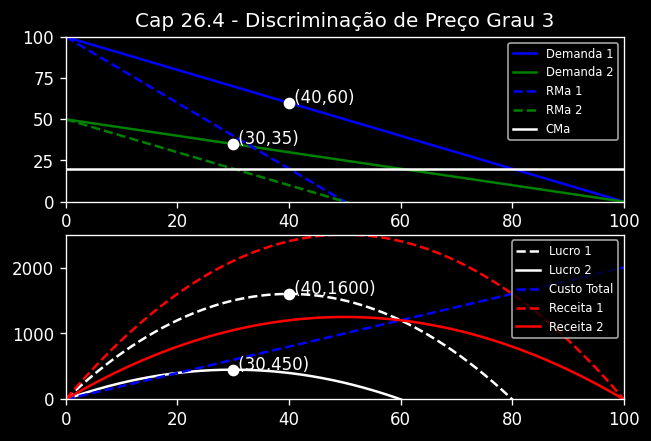

In [72]:
# Gerando o gráfico
fig = plt.figure(dpi=120)
ax = plt.axes()
ax.grid(color='gray',linewidth=.2)

plt.subplot(2,1,1) # rows, columns, panel number

plt.title('Cap 26.4 - Discriminação de Preço Grau 3')

plt.plot(dataframe['x'], dataframe['dem_lin1'],'-',color='blue', label='Demanda 1')
plt.plot(dataframe['x'], dataframe['dem_lin2'],'-',color='green', label='Demanda 2')
plt.plot(dataframe['x'], dataframe['rec_marg1'],'--',color='blue', label='RMa 1')
plt.plot(dataframe['x'], dataframe['rec_marg2'],'--',color='green', label='RMa 2')
plt.plot(dataframe['x'], dataframe['c_marginal'],'-',color='white', label='CMa')
plt.legend(loc='upper right', fontsize=7)
plt.ylim(0,max(dataframe['dem_lin1']))
plt.xlim(0,max(x))

# adding points with a label
coord = A
plt.plot(coord[0],coord[1],marker='o',color='white')
plt.annotate(' ({:.0f},{:.0f})'.format(coord[0],coord[1]),(coord[0],coord[1]))

coord = B
plt.plot(coord[0],coord[1],marker='o',color='white')
plt.annotate(' ({:.0f},{:.0f})'.format(coord[0],coord[1]),(coord[0],coord[1]))


plt.subplot(2,1,2) # rows, columns, panel number
plt.plot(dataframe['x'], dataframe['lucro1'],'--',color='white', label='Lucro 1')
plt.plot(dataframe['x'], dataframe['lucro2'],'-',color='white', label='Lucro 2')
plt.plot(dataframe['x'], dataframe['c_total'],'--',color='blue', label='Custo Total')
plt.plot(dataframe['x'], dataframe['receita1'],'--',color='red', label='Receita 1')
plt.plot(dataframe['x'], dataframe['receita2'],'-',color='red', label='Receita 2')

plt.legend(loc='upper right', fontsize=7)
plt.ylim(0,max(dataframe['receita1']))
plt.xlim(0,max(x))

# adding points with a label
coord = A2
plt.plot(coord[0],coord[1],marker='o',color='white')
plt.annotate(' ({:.0f},{:.0f})'.format(coord[0],coord[1]),(coord[0],coord[1]))

coord = B2
plt.plot(coord[0],coord[1],marker='o',color='white')
plt.annotate(' ({:.0f},{:.0f})'.format(coord[0],coord[1]),(coord[0],coord[1]))

plt.show()